In [126]:
# import the necessary packages
from collections import deque
from imutils.video import VideoStream
import numpy as np
import argparse
import imutils
from skimage.morphology import erosion, dilation, opening, closing
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from PIL import Image
from IPython.display import Image as IPImage, display

(np.float64(-0.5), np.float64(639.5), np.float64(399.5), np.float64(-0.5))

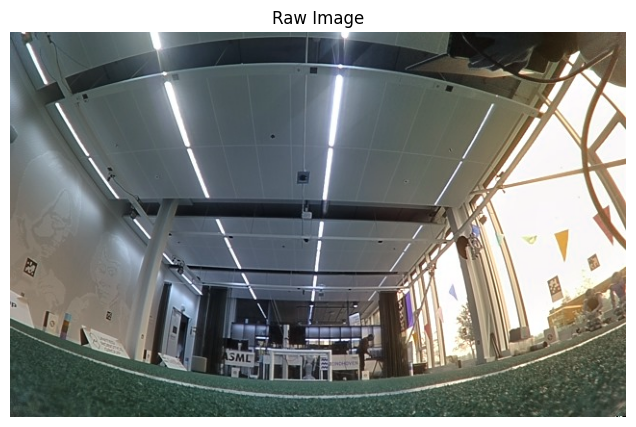

In [127]:
# ORIGINAL IMAGE
img = cv2.imread("raw_img.jpg") #,cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 5))
plt.title('Raw Image')
plt.imshow(img) #, cmap='gray')
plt.axis('off')



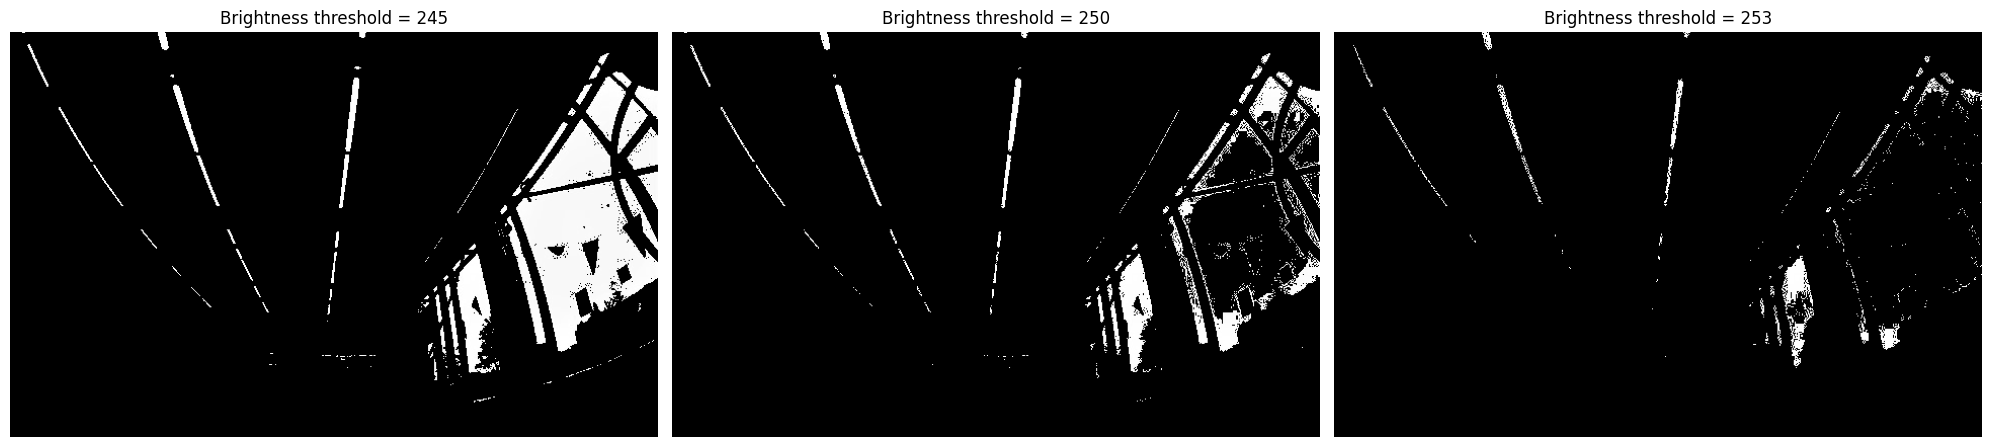

In [128]:

# BRIGHTNESS THRESHOLD
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20, 15))

_, mask245 = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY)
masked_image_245 = cv2.bitwise_and(gray, gray, mask=mask245)
plt.subplot(1, 3, 1)
plt.title('Brightness threshold = 245')
plt.imshow(masked_image_245, cmap='gray')
plt.axis('off')

_, mask250 = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)
masked_image_250 = cv2.bitwise_and(gray, gray, mask=mask250)
plt.subplot(1, 3, 2)
plt.title('Brightness threshold = 250')
plt.imshow(masked_image_250, cmap='gray')
plt.axis('off')


_, mask253 = cv2.threshold(gray, 253, 255, cv2.THRESH_BINARY)
masked_image_253 = cv2.bitwise_and(gray, gray, mask=mask253)
plt.subplot(1, 3, 3)
plt.title('Brightness threshold = 253')
plt.imshow(masked_image_253, cmap='gray')
plt.axis('off')
plt.tight_layout(pad=1.01)

(np.float64(-0.5), np.float64(639.5), np.float64(399.5), np.float64(-0.5))

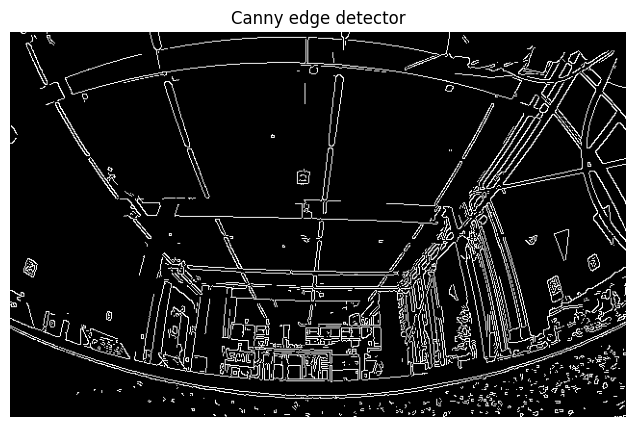

In [129]:
# CANNY EDGE DETECTOR
edges = cv2.Canny(gray, 150, 200)
plt.figure(figsize=(10, 5))
plt.title('Canny edge detector')
plt.imshow(edges, cmap='gray')
plt.axis('off')

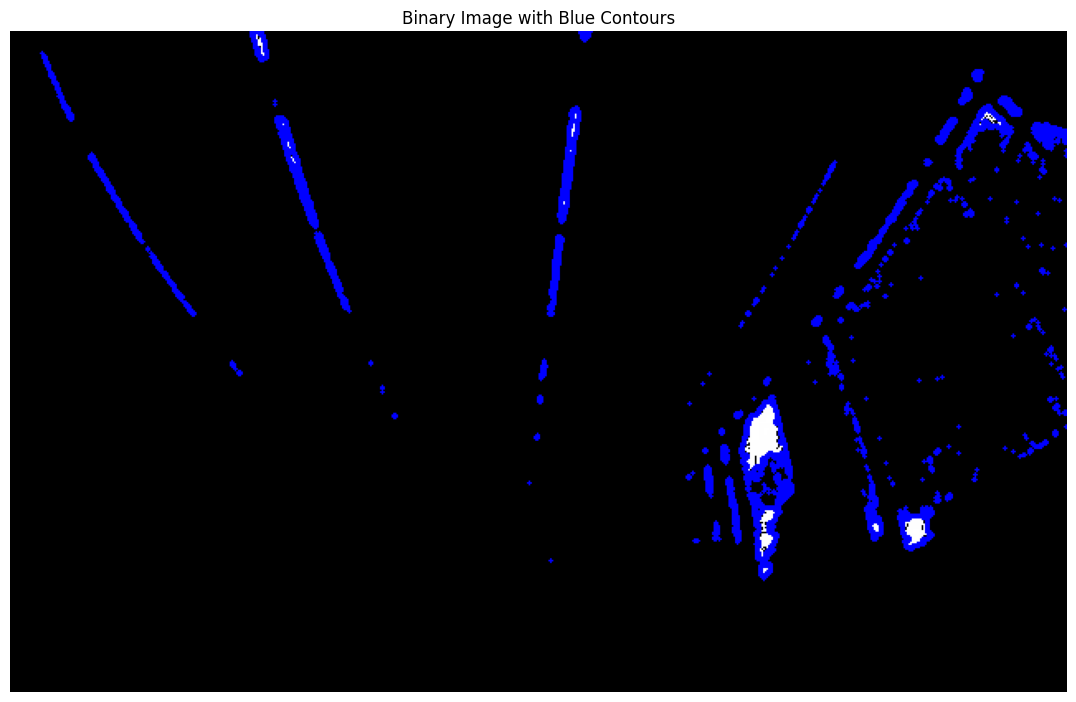

In [130]:
# Convert binary image to 3 channels (RGB) to add blue contours
masked_image_rgb = cv2.cvtColor(masked_image_253, cv2.COLOR_GRAY2BGR)

# Detect contours
contours, _ = cv2.findContours(masked_image_253, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours in blue
cv2.drawContours(masked_image_rgb, contours, -1, (0, 0, 255), 2)  # Blue color in BGR format

# Display the result
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.title('Binary Image with Blue Contours')
plt.imshow(masked_image_rgb)  # No cmap needed, as it's now RGB
plt.axis('off')
plt.show()


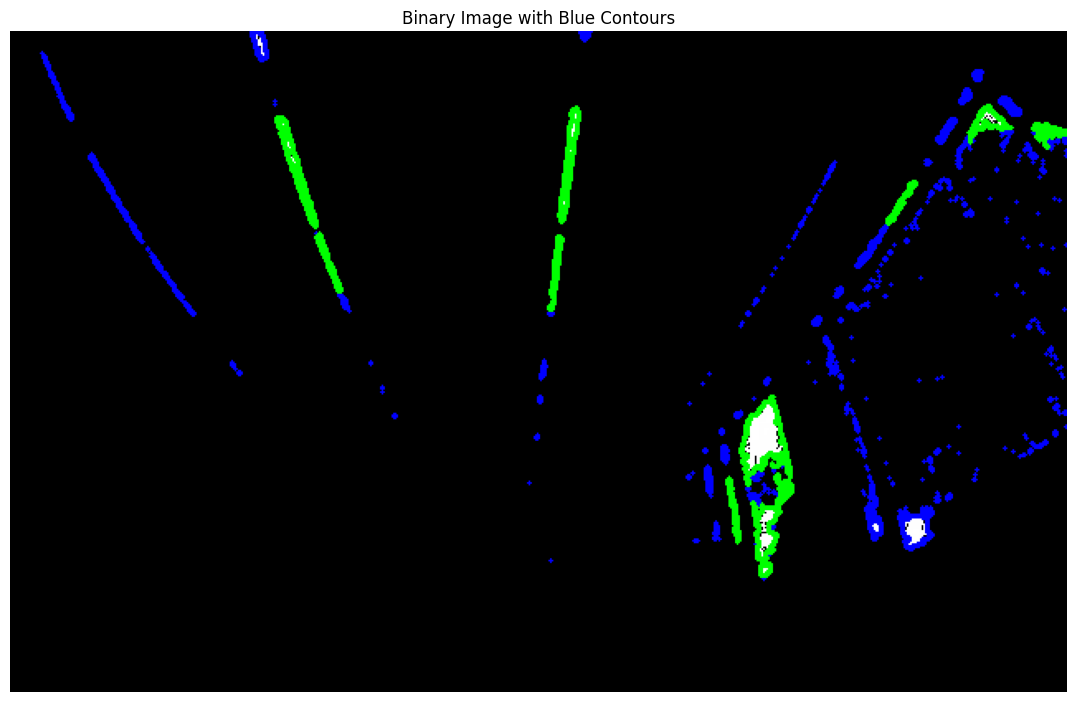

In [134]:
# Keeping top 10 biggest contours
contours10 = sorted(contours, key=len, reverse=True)[:10]
cv2.drawContours(masked_image_rgb, contours10, -1, ( 0, 255, 0), 2)  # Blue color in BGR format

# Display the result
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.title('Binary Image with Blue Contours')
plt.imshow(masked_image_rgb)  # No cmap needed, as it's now RGB
plt.axis('off')
plt.show()
